In [1]:
import time
import pandas as pd
import urllib.request
import bs4
from collections import Counter
import konlpy
from konlpy.tag import Hannanum
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [2]:
data = pd.read_excel('C:/marketing/data.xlsx')
a = list(data['실시간비율'])
b = []
c = []
d = []
for i, v in enumerate(a):
    b.append([v,i])
    if i % 7 == 6:
        c.append(max(b)[1])
        b = []
for i in c:
    d.append(str(data.loc[i, '날짜'])[:10].replace('-',''))

In [30]:
tagger=Hannanum()
check = ['경향신문','국민일보','동아일보','문화일보','서울신문','세계일보','조선일보','중앙일보','한겨레','한국일보','뉴스1','뉴시스','연합뉴스','채널A','한국경제TV','JTBC','KBS','MBC','MBN','SBS','TV조선','YTN','노컷뉴스','데일리안','미디어오늘','아이뉴스24','오마이뉴스','프레시안','디지털데일리','디지털타임스','블로터','전자신문','ZDNet Korea']
stopwords = ['단독','논란','구독','뉴스','채널','네이버','연합뉴스','금지','재배포','오후','오전','이후','이날','사진','콘텐츠','영상편집','영상취재','기자','만원','때문']

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_21280\933770517.py:34: FutureWarning: The default value of regex will change from True to False in a future version.
  text_filtered = text.str.replace("[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]"," ")
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_21280\933770517.py:34: FutureWarning: The default value of regex will change from True to False in a future version.
  text_filtered = text.str.replace("[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]"," ")
C:\Users\wjsth\anaconda3\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 52264 (\N{HANGUL SYLLABLE CA}) missing from current font.
  func(*args, **kwargs)
C:\Users\wjsth\anaconda3\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 47049 (\N{HANGUL SYLLABLE RYANG}) missing from current font.
  func(*args, **kwargs)
C:\Users\wjsth\anaconda3\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 51204 (\N{HANGUL SYLLABLE JEON}) missing from current font.
  func(*args, **kwargs)
C:\Users\wjsth\anacond

C:\Users\wjsth\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 52264 (\N{HANGUL SYLLABLE CA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\wjsth\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 47049 (\N{HANGUL SYLLABLE RYANG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\wjsth\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 51204 (\N{HANGUL SYLLABLE JEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\wjsth\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 48373 (\N{HANGUL SYLLABLE BOG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\wjsth\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 49324 (\N{HANGUL SYLLABLE SA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\wjsth\anaconda3

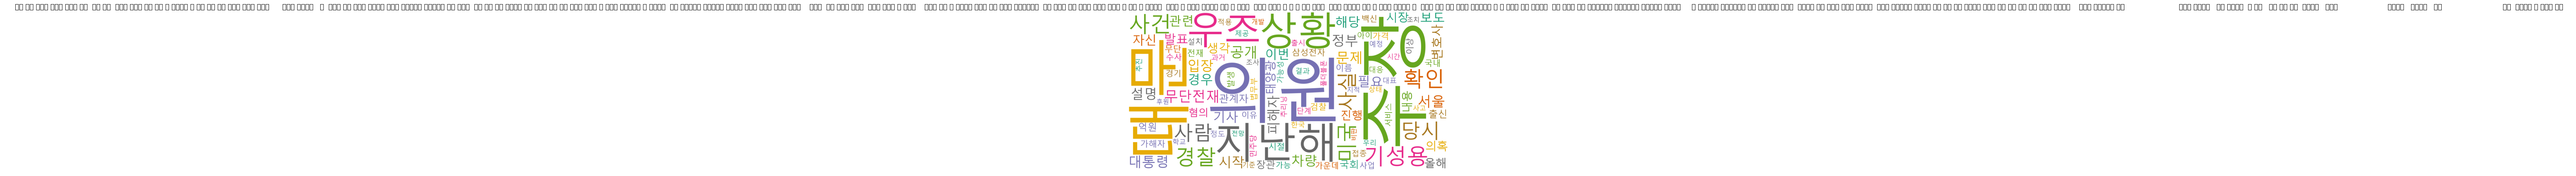

C:\Users\wjsth\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 50980 (\N{HANGUL SYLLABLE YUN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\wjsth\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 49437 (\N{HANGUL SYLLABLE SEOG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\wjsth\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 50676 (\N{HANGUL SYLLABLE YEOL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\wjsth\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 44160 (\N{HANGUL SYLLABLE GEOM}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\wjsth\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 52272 (\N{HANGUL SYLLABLE CAL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\wjsth\anacond

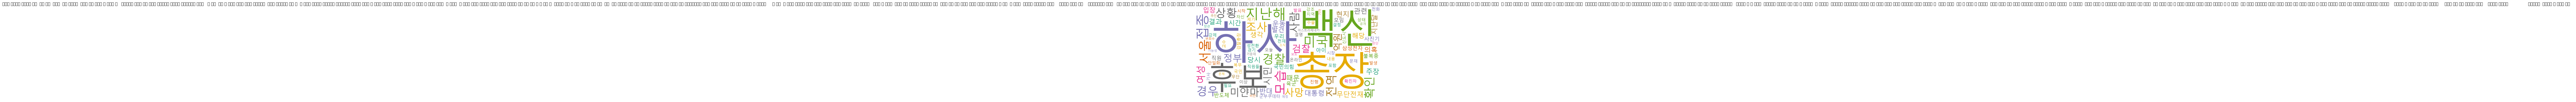

In [8]:
for i in ['20210225','20210304']:
    url = "https://news.naver.com/main/ranking/popularDay.naver?date=" + i
    html = urllib.request.urlopen(url)

    bs_obj = bs4.BeautifulSoup(html, "html.parser")
    div = bs_obj.findAll("div", {"class":"rankingnews_box"})

    k=1
    data=[]
    col = ['No','Publisher','Rank','Title','URL','Contents']

    for i in div:
        publisher = i.find("strong", {"class":"rankingnews_name"})
        if publisher.text in check:
            ul = i.find("ul", {"class":"rankingnews_list"})
            lis = ul.findAll("li")
            for j in lis:
                em_tag = j.find("em")
                a_tag = j.find("a")

                if (a_tag != None) and (em_tag != None):
                    article_url = a_tag['href']
                    news=urllib.request.urlopen(article_url)
                    news_obj = bs4.BeautifulSoup(news, "html.parser")
                    body = news_obj.find("div", {"id":"newsct_article","class":"newsct_article _article_body"})
                    contents = body.text.replace('\n','')
                    row = [k, publisher.text, em_tag.text, a_tag.text, article_url, contents]
                    data.append(row)
                    k += 1

    df = pd.DataFrame(data, columns = col)

    text = df[df['Publisher'].isin(check)]['Contents']
    text_filtered = text.str.replace("[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]"," ")

    tokenized_data_filtered=[]
    for i in text_filtered:
        temp = tagger.nouns(i)
        temp = [word for word in temp if len(word)>1]  ## 두글자 이상이면 포함, 리스트 함축
        temp = [word for word in temp if word not in stopwords]
        tokenized_data_filtered.append(temp)

    tokens=[]
    for k in tokenized_data_filtered:
        tokens.extend(k)

    num_top_tokens=100

    counted_tokens=Counter(tokens)
    top_keywords=dict(counted_tokens.most_common(num_top_tokens))

    wc = WordCloud(font_path='malgun',width=2000, height=1000,background_color='white',colormap='Dark2',random_state=2)
    wc.generate_from_frequencies(top_keywords)

    fig=plt.figure()
    fig.set_size_inches(10,10)

    plt.axis('off')
    plt.title(i)
    plt.imshow(wc)
    #plt.savefig('D:/marketing/wc/' + i + '.png')

    time.sleep(3)

In [6]:
s = 'D:/marketing/wc/'+'20210225'+'.png'
print(s)

D:/marketing/wc/20210225.png


In [10]:
d

['20210225',
 '20210304',
 '20210312',
 '20210323',
 '20210325',
 '20210407',
 '20210412',
 '20210417',
 '20210426',
 '20210505',
 '20210506',
 '20210513',
 '20210524',
 '20210530',
 '20210607',
 '20210610',
 '20210618',
 '20210628',
 '20210703',
 '20210709',
 '20210716',
 '20210725',
 '20210802',
 '20210808',
 '20210812',
 '20210823',
 '20210826',
 '20210902',
 '20210911',
 '20210916',
 '20210923',
 '20211005',
 '20211009',
 '20211018',
 '20211025',
 '20211028',
 '20211105',
 '20211111',
 '20211123',
 '20211129',
 '20211204',
 '20211214',
 '20211216',
 '20211226',
 '20220101',
 '20220109',
 '20220116',
 '20220126',
 '20220201',
 '20220207',
 '20220211',
 '20220222',
 '20220224',
 '20220307',
 '20220310',
 '20220317',
 '20220324',
 '20220404',
 '20220410',
 '20220416',
 '20220421',
 '20220502',
 '20220507',
 '20220518',
 '20220523',
 '20220529',
 '20220608',
 '20220615',
 '20220616',
 '20220629',
 '20220630',
 '20220708',
 '20220719',
 '20220725',
 '20220802',
 '20220808',
 '20220811',

In [28]:
date = '20210412'

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_21280\2516414053.py:33: FutureWarning: The default value of regex will change from True to False in a future version.
  text_filtered = text.str.replace("[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]"," ")


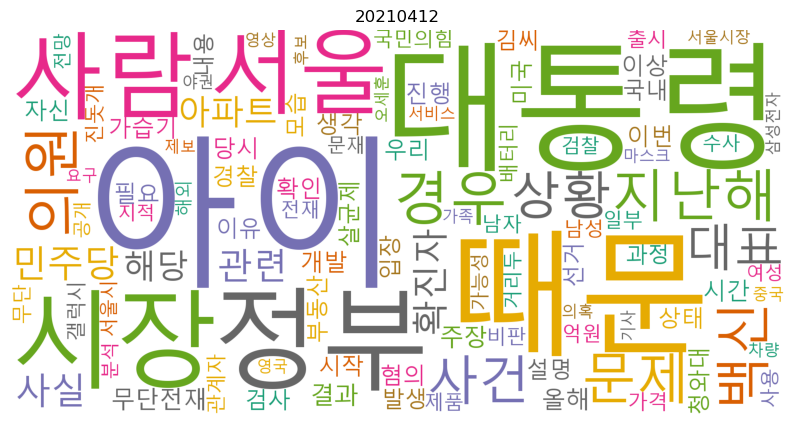

In [29]:
url = "https://news.naver.com/main/ranking/popularDay.naver?date=" + date
html = urllib.request.urlopen(url)

bs_obj = bs4.BeautifulSoup(html, "html.parser")
div = bs_obj.findAll("div", {"class":"rankingnews_box"})

k=1
data=[]
col = ['No','Publisher','Rank','Title','URL','Contents']

for i in div:
    publisher = i.find("strong", {"class":"rankingnews_name"})
    if publisher.text in check:
        ul = i.find("ul", {"class":"rankingnews_list"})
        lis = ul.findAll("li")
        for j in lis:
            em_tag = j.find("em")
            a_tag = j.find("a")

            if (a_tag != None) and (em_tag != None):
                article_url = a_tag['href']
                news=urllib.request.urlopen(article_url)
                news_obj = bs4.BeautifulSoup(news, "html.parser")
                body = news_obj.find("div", {"id":"newsct_article","class":"newsct_article _article_body"})
                contents = body.text.replace('\n','')
                row = [k, publisher.text, em_tag.text, a_tag.text, article_url, contents]
                data.append(row)
                k += 1

df = pd.DataFrame(data, columns = col)

text = df[df['Publisher'].isin(check)]['Contents']
text_filtered = text.str.replace("[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]"," ")

tokenized_data_filtered=[]
for i in text_filtered:
    temp = tagger.nouns(i)
    temp = [word for word in temp if len(word)>1]  ## 두글자 이상이면 포함, 리스트 함축
    temp = [word for word in temp if word not in stopwords]
    tokenized_data_filtered.append(temp)

tokens=[]
for k in tokenized_data_filtered:
    tokens.extend(k)

num_top_tokens=100

counted_tokens=Counter(tokens)
top_keywords=dict(counted_tokens.most_common(num_top_tokens))

wc = WordCloud(font_path='malgun',width=2000, height=1000,background_color='white',colormap='Dark2',random_state=2)
wc.generate_from_frequencies(top_keywords)

fig=plt.figure()
fig.set_size_inches(10,10)

plt.axis('off')
plt.title(date)
plt.imshow(wc)
plt.savefig('D:/marketing/wc/' + date + '.png')

In [36]:
for n, y in enumerate(['20210225','20210304']):
    print(y)
    url = "https://news.naver.com/main/ranking/popularDay.naver?date=" + y
    html = urllib.request.urlopen(url)

    bs_obj = bs4.BeautifulSoup(html, "html.parser")
    div = bs_obj.findAll("div", {"class":"rankingnews_box"})

    k=1
    data=[]
    col = ['No','Publisher','Rank','Title','URL','Contents']

    for i in div:
        publisher = i.find("strong", {"class":"rankingnews_name"})
        if publisher.text in check:
            ul = i.find("ul", {"class":"rankingnews_list"})
            lis = ul.findAll("li")
            for j in lis:
                em_tag = j.find("em")
                a_tag = j.find("a")

                if (a_tag != None) and (em_tag != None):
                    article_url = a_tag['href']
                    news=urllib.request.urlopen(article_url)
                    news_obj = bs4.BeautifulSoup(news, "html.parser")
                    body = news_obj.find("div", {"id":"newsct_article","class":"newsct_article _article_body"})
                    contents = body.text.replace('\n','')
                    row = [k, publisher.text, em_tag.text, a_tag.text, article_url, contents]
                    data.append(row)
                    k += 1

    df = pd.DataFrame(data, columns = col)

    text = df[df['Publisher'].isin(check)]['Contents']
    text_filtered = text.str.replace("[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]"," ")

    tokenized_data_filtered=[]
    for j in text_filtered:
        temp = tagger.nouns(j)
        temp = [word for word in temp if len(word)>1]  ## 두글자 이상이면 포함, 리스트 함축
        temp = [word for word in temp if word not in stopwords]
        tokenized_data_filtered.append(temp)

    tokens=[]
    for k in tokenized_data_filtered:
        tokens.extend(k)

    num_top_tokens=100

    counted_tokens=Counter(tokens)
    top_keywords=dict(counted_tokens.most_common(num_top_tokens))
    globals()['tk_df{}'.format(n)] = pd.DataFrame(list(top_keywords.items()), columns=['keywords','freq'])
    print('='*30)


20210225


KeyboardInterrupt: 

In [34]:
df

,No,Publisher,Rank,Title,URL,Contents
0,1,중앙일보,1,"사유리 '스타벅스 문전박대' 논란…""내 탓, 직접 찾아가 사과""",https://n.news.naver.com/article/025/000308036...,[사진 사유리 인스타그램] 화재를 피하기 위해 찾은 스타벅스 ...
1,2,중앙일보,2,"'기성용 성폭행' 제보자들, 오히려 다른 성폭력 가해자?",https://n.news.naver.com/article/025/000308048...,25일 SNS에 글 올려 결백 주장 기성용 선수. 연합뉴스 ...
2,3,중앙일보,3,"""갑자기 바지 속으로 손 넣었다"" 또 터진 알렉산더 왕 미투",https://n.news.naver.com/article/025/000308040...,패션 디자이너 알렉산더 왕. AFP-=연합뉴스 미국 출신의 유...
3,4,중앙일보,4,"다리 6개, 꼬리 2개…쌍둥이 되려다 한몸으로 태어난 강아지 [영상]",https://n.news.naver.com/article/025/000308022...,좌우 각각 3개씩 총 6개의 다리를 가지고 태어난 강아지 '스키퍼'가 이불 위를...
4,5,중앙일보,5,사유리 '스벅 논란' 뜻밖의 불똥…수기 명부 문제 드러났다,https://n.news.naver.com/article/025/000308055...,방송인 사유리. 일간스포츠 방송인 사유리의 ‘스타벅스 입장 거부’ 논...
...,...,...,...,...,...,...
160,161,디지털데일리,1,"낸드 2·3위도 128단 넘었다…'유일한 제자리' 삼성, 초격차 전략 비상",https://n.news.naver.com/article/138/000209936...,"- 日 키옥시아·美 웨스턴디지털, 162단 낸드 공동 개발 [디지털데일리 김..."
161,162,디지털데일리,2,"""폴드2·Z플립 100일간 써보세요""…삼성전자 미국서 폴더블 대중화 ‘가속’",https://n.news.naver.com/article/138/000209936...,- 4월1일까지 ‘갤럭시Z폴드2·갤럭시Z플립 5G’ 대상 환불 기간 연장 ...
162,163,디지털데일리,3,"SK하이닉스, ‘메모리 2강’ 굳힌다…EUV 장비 대거 확보",https://n.news.naver.com/article/138/000209934...,- ASML과 5년간 4조7500억원 규모 계약 체결 [디지털데일리 김도현 ...
163,164,디지털데일리,4,널뛰는 비트코인…금융 시장 ‘메기’ 됐다,https://n.news.naver.com/article/138/000209932...,"[디지털데일리 박현영기자] 비트코인(BTC)의 가격 변동성이 매우 심해진 가운데, ..."


In [35]:
tk_df0

,keywords,freq
0,의원,137
1,주장,135
2,지난해,104
3,상황,102
4,우즈,101
...,...,...
95,조치,38
96,전망,38
97,후원,38
98,기본주택,38


In [49]:
tk_df0

,keywords,freq
0,의원,137
1,주장,135
2,지난해,104
3,상황,102
4,우즈,101
...,...,...
95,비판,38
96,조치,38
97,전망,38
98,후원,38


In [50]:
tk_df1

,keywords,freq
0,하사,216
1,백신,176
2,총장,171
3,후보,166
4,지난해,137
...,...,...
95,소식,45
96,기아,45
97,추진,45
98,변희수,45


In [51]:
r1 = pd.concat([tk_df0, tk_df1], ignore_index = True)
print(r1)

    keywords  freq
0         의원   137
1         주장   135
2        지난해   104
3         상황   102
4         우즈   101
..       ...   ...
195       소식    45
196       기아    45
197       추진    45
198      변희수    45
199       조치    44

[200 rows x 2 columns]


In [53]:
r1.groupby('keywords')['keywords'].count()

keywords
가격     1
가능     1
가능성    2
가운데    2
가해자    1
      ..
혐의     1
확인     2
확진자    1
후보     1
후원     1
Name: keywords, Length: 147, dtype: int64

In [54]:
tk_df0[tk_df0['keywords'] == '가능성']

,keywords,freq
70,가능성,45


In [55]:
tk_df1[tk_df1['keywords'] == '가능성']

,keywords,freq
86,가능성,47


In [56]:
r1.groupby('keywords')['freq'].sum()

keywords
가격      52
가능      46
가능성     92
가운데     96
가해자     52
      ... 
혐의      55
확인     186
확진자     55
후보     166
후원      38
Name: freq, Length: 147, dtype: int64

---
# 최종

In [2]:
import time
import pandas as pd
import urllib.request
import requests
import bs4
from collections import Counter
import konlpy
from konlpy.tag import Hannanum
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [3]:
data = pd.read_excel('D:/marketing/data1.xlsx')
a = list(data['실검'])
b = []
c = []
d = []
for i, v in enumerate(a):
    b.append([v,i])
    if i % 7 == 6:
        c.append(max(b)[1])
        b = []
for i in c:
    d.append(str(data.loc[i, '날짜'])[:10].replace('-',''))

In [4]:
e = []
for n, y in enumerate(d):
    e.append((n,y))
e

[(0, '20210225'),
 (1, '20210304'),
 (2, '20210312'),
 (3, '20210323'),
 (4, '20210325'),
 (5, '20210407'),
 (6, '20210412'),
 (7, '20210417'),
 (8, '20210426'),
 (9, '20210505'),
 (10, '20210506'),
 (11, '20210513'),
 (12, '20210524'),
 (13, '20210530'),
 (14, '20210607'),
 (15, '20210610'),
 (16, '20210618'),
 (17, '20210628'),
 (18, '20210703'),
 (19, '20210709'),
 (20, '20210716'),
 (21, '20210725'),
 (22, '20210802'),
 (23, '20210808'),
 (24, '20210812'),
 (25, '20210823'),
 (26, '20210826'),
 (27, '20210902'),
 (28, '20210911'),
 (29, '20210916'),
 (30, '20210923'),
 (31, '20211005'),
 (32, '20211009'),
 (33, '20211018'),
 (34, '20211025'),
 (35, '20211028'),
 (36, '20211105'),
 (37, '20211111'),
 (38, '20211123'),
 (39, '20211129'),
 (40, '20211204'),
 (41, '20211214'),
 (42, '20211216'),
 (43, '20211226'),
 (44, '20220101'),
 (45, '20220109'),
 (46, '20220116'),
 (47, '20220126'),
 (48, '20220201'),
 (49, '20220207'),
 (50, '20220211'),
 (51, '20220222'),
 (52, '20220224'),
 (5

In [5]:
len(e)

115

In [6]:
tagger=Hannanum()
check = ['경향신문','국민일보','동아일보','문화일보','서울신문','세계일보','조선일보','중앙일보','한겨레','한국일보','뉴스1','뉴시스','연합뉴스','채널A','한국경제TV','JTBC','KBS','MBC','MBN','SBS','TV조선','YTN','노컷뉴스','데일리안','미디어오늘','아이뉴스24','오마이뉴스','프레시안','디지털데일리','디지털타임스','블로터','전자신문','ZDNet Korea']
stopwords = ['단독','논란','구독','뉴스','채널','네이버','연합뉴스','금지','재배포','오후','오전','이후','이날','사진','콘텐츠','영상편집','영상취재','기자','만원','때문']

In [7]:
for n, y in e[17:]:
    print("n =", n, "y =", y)
    url = "https://news.naver.com/main/ranking/popularDay.naver?date=" + y
    headers = {}
    html = urllib.request.urlopen(url)
    time.sleep(10)

    bs_obj = bs4.BeautifulSoup(html, "html.parser")
    div = bs_obj.findAll("div", {"class":"rankingnews_box"})

    k=1
    data=[]
    col = ['No','Publisher','Rank','Title','URL','Contents']

    for i in div:
        publisher = i.find("strong", {"class":"rankingnews_name"})
        if publisher.text in check:
            ul = i.find("ul", {"class":"rankingnews_list"})
            lis = ul.findAll("li")
            for j in lis:
                em_tag = j.find("em")
                a_tag = j.find("a")

                if (a_tag != None) and (em_tag != None):
                    article_url = a_tag['href']
                    news=urllib.request.urlopen(article_url)
                    news_obj = bs4.BeautifulSoup(news, "html.parser")
                    body = news_obj.find("div", {"id":"newsct_article","class":"newsct_article _article_body"})
                    contents = body.text.replace('\n','')
                    row = [k, publisher.text, em_tag.text, a_tag.text, article_url, contents]
                    data.append(row)
                    k += 1

    df = pd.DataFrame(data, columns = col)
    
    time.sleep(5)
    
    text = df[df['Publisher'].isin(check)]['Contents']
    text_filtered = text.str.replace("[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]"," ")
    
    time.sleep(5)
    
    tokenized_data_filtered=[]
    for j in text_filtered:
        temp = tagger.nouns(j)
        temp = [word for word in temp if len(word)>1]  ## 두글자 이상이면 포함, 리스트 함축
        temp = [word for word in temp if word not in stopwords]
        tokenized_data_filtered.append(temp)
        
    time.sleep(5)

    tokens=[]
    for k in tokenized_data_filtered:
        tokens.extend(k)
        
    time.sleep(5)

    num_top_tokens=100
    counted_tokens=Counter(tokens)
    top_keywords=dict(counted_tokens.most_common(num_top_tokens))
    
    time.sleep(5)
    
    globals()['tk_df{}'.format(n)] = pd.DataFrame(list(top_keywords.items()), columns=['keywords','freq'])
    globals()['tk_df{}'.format(n)].to_csv('D:/marketing/data/tk_df' + str(n) + '.csv', encoding = 'utf-8-sig')
    time.sleep(10)
    print('='*10)
    time.sleep(10)
    print('='*20)
    time.sleep(10)
    print('#'*30)

n = 17 y = 20210628


ConnectionResetError: [WinError 10054] 현재 연결은 원격 호스트에 의해 강제로 끊겼습니다

In [6]:
for n, y in e[10:]:
    print("n =", n, "y =", y)
    url = "https://news.naver.com/main/ranking/popularDay.naver?date=" + y
    headers = {'User-Agent' : 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/113.0.0.0 Safari/537.36'}
    html = requests.get(url, headers = headers)
    time.sleep(5)

    bs_obj = bs4.BeautifulSoup(html.content, "html.parser")
    div = bs_obj.findAll("div", {"class":"rankingnews_box"})

    k=1
    data=[]
    col = ['No','Publisher','Rank','Title','URL','Contents']

    for i in div:
        publisher = i.find("strong", {"class":"rankingnews_name"})
        if publisher.text in check:
            ul = i.find("ul", {"class":"rankingnews_list"})
            lis = ul.findAll("li")
            for j in lis:
                em_tag = j.find("em")
                a_tag = j.find("a")

                if (a_tag != None) and (em_tag != None):
                    article_url = a_tag['href']
                    news=urllib.request.urlopen(article_url)
                    news_obj = bs4.BeautifulSoup(news, "html.parser")
                    body = news_obj.find("div", {"id":"newsct_article","class":"newsct_article _article_body"})
                    contents = body.text.replace('\n','')
                    row = [k, publisher.text, em_tag.text, a_tag.text, article_url, contents]
                    data.append(row)
                    k += 1

    df = pd.DataFrame(data, columns = col)
    
    time.sleep(15)
    
    text = df[df['Publisher'].isin(check)]['Contents']
    text_filtered = text.str.replace("[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]"," ")
    
    time.sleep(15)
    
    tokenized_data_filtered=[]
    for j in text_filtered:
        temp = tagger.nouns(j)
        temp = [word for word in temp if len(word)>1]  ## 두글자 이상이면 포함, 리스트 함축
        temp = [word for word in temp if word not in stopwords]
        tokenized_data_filtered.append(temp)
        
    time.sleep(15)

    tokens=[]
    for k in tokenized_data_filtered:
        tokens.extend(k)
        
    time.sleep(15)

    num_top_tokens=100
    counted_tokens=Counter(tokens)
    top_keywords=dict(counted_tokens.most_common(num_top_tokens))
    
    time.sleep(15)
    
    globals()['tk_df{}'.format(n)] = pd.DataFrame(list(top_keywords.items()), columns=['keywords','freq'])
    globals()['tk_df{}'.format(n)].to_csv('D:/marketing/data2/tk_df' + str(n) + '.csv', encoding = 'utf-8-sig')
    time.sleep(10)
    print('='*10)
    time.sleep(10)
    print('='*20)
    time.sleep(10)
    print('#'*30)

n = 10 y = 20210506


C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_6208\2084013668.py:39: FutureWarning: The default value of regex will change from True to False in a future version.
  text_filtered = text.str.replace("[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]"," ")


##############################
n = 11 y = 20210513


C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_6208\2084013668.py:39: FutureWarning: The default value of regex will change from True to False in a future version.
  text_filtered = text.str.replace("[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]"," ")


##############################
n = 12 y = 20210524


C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_6208\2084013668.py:39: FutureWarning: The default value of regex will change from True to False in a future version.
  text_filtered = text.str.replace("[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]"," ")


##############################
n = 13 y = 20210530


C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_6208\2084013668.py:39: FutureWarning: The default value of regex will change from True to False in a future version.
  text_filtered = text.str.replace("[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]"," ")


##############################
n = 14 y = 20210607


C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_6208\2084013668.py:39: FutureWarning: The default value of regex will change from True to False in a future version.
  text_filtered = text.str.replace("[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]"," ")


##############################
n = 15 y = 20210610


C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_6208\2084013668.py:39: FutureWarning: The default value of regex will change from True to False in a future version.
  text_filtered = text.str.replace("[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]"," ")


##############################
n = 16 y = 20210618


C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_6208\2084013668.py:39: FutureWarning: The default value of regex will change from True to False in a future version.
  text_filtered = text.str.replace("[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]"," ")


##############################
n = 17 y = 20210628


C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_6208\2084013668.py:39: FutureWarning: The default value of regex will change from True to False in a future version.
  text_filtered = text.str.replace("[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]"," ")


##############################
n = 18 y = 20210703


C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_6208\2084013668.py:39: FutureWarning: The default value of regex will change from True to False in a future version.
  text_filtered = text.str.replace("[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]"," ")


##############################
n = 19 y = 20210709


HTTPError: HTTP Error 500: Internal Server Error

In [11]:
for n, y in e[72:]:
    print("n =", n, "y =", y)
    url = "https://news.naver.com/main/ranking/popularDay.naver?date=" + y
    headers = {'User-Agent' : 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/113.0.0.0 Safari/537.36'}
    html = requests.get(url, headers = headers)
    time.sleep(10)

    bs_obj = bs4.BeautifulSoup(html.content, "html.parser")
    div = bs_obj.findAll("div", {"class":"rankingnews_box"})

    k=1
    data=[]
    col = ['No','Publisher','Rank','Title','URL','Contents']

    for i in div:
        publisher = i.find("strong", {"class":"rankingnews_name"})
        if publisher.text in check:
            ul = i.find("ul", {"class":"rankingnews_list"})
            lis = ul.findAll("li")
            for j in lis:
                em_tag = j.find("em")
                a_tag = j.find("a")

                if (a_tag != None) and (em_tag != None):
                    article_url = a_tag['href']
                    news=urllib.request.urlopen(article_url)
                    news_obj = bs4.BeautifulSoup(news, "html.parser")
                    body = news_obj.find("div", {"id":"newsct_article","class":"newsct_article _article_body"})
                    contents = body.text.replace('\n','')
                    row = [k, publisher.text, em_tag.text, a_tag.text, article_url, contents]
                    data.append(row)
                    k += 1

    df = pd.DataFrame(data, columns = col)
    
    time.sleep(1)
    
    text = df[df['Publisher'].isin(check)]['Contents']
    text_filtered = text.str.replace("[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]"," ")
    
    time.sleep(1)
    
    tokenized_data_filtered=[]
    for j in text_filtered:
        temp = tagger.nouns(j)
        temp = [word for word in temp if len(word)>1]  ## 두글자 이상이면 포함, 리스트 함축
        temp = [word for word in temp if word not in stopwords]
        tokenized_data_filtered.append(temp)
        
    time.sleep(1)

    tokens=[]
    for k in tokenized_data_filtered:
        tokens.extend(k)
        
    time.sleep(1)

    num_top_tokens=100
    counted_tokens=Counter(tokens)
    top_keywords=dict(counted_tokens.most_common(num_top_tokens))
    
    time.sleep(1)
    
    globals()['tk_df{}'.format(n)] = pd.DataFrame(list(top_keywords.items()), columns=['keywords','freq'])
    globals()['tk_df{}'.format(n)].to_csv('D:/marketing/data2/tk_df' + str(n) + '.csv', encoding = 'utf-8-sig')
    time.sleep(10)
    print('='*10)
    if n % 3 == 0:
        time.sleep(300)
        print("#" * 30)

n = 72 y = 20220719


AttributeError: 'NoneType' object has no attribute 'text'

In [26]:
for n, y in e[107:]:
    print("n =", n, "y =", y)
    url = "https://news.naver.com/main/ranking/popularDay.naver?date=" + y
    headers = {}
    html = urllib.request.urlopen(url)
    time.sleep(10)

    bs_obj = bs4.BeautifulSoup(html, "html.parser")
    div = bs_obj.findAll("div", {"class":"rankingnews_box"})

    k=1
    data=[]
    col = ['No','Publisher','Rank','Title','URL','Contents']

    for i in div:
        publisher = i.find("strong", {"class":"rankingnews_name"})
        if publisher.text in check:
            ul = i.find("ul", {"class":"rankingnews_list"})
            lis = ul.findAll("li")
            for j in lis:
                em_tag = j.find("em")
                a_tag = j.find("a")

                if (a_tag != None) and (em_tag != None):
                    article_url = a_tag['href']
                    news=urllib.request.urlopen(article_url)
                    news_obj = bs4.BeautifulSoup(news, "html.parser")
                    body = news_obj.find("div", {"id":"newsct_article","class":"newsct_article _article_body"})
                    contents = body.text.replace('\n','')
                    row = [k, publisher.text, em_tag.text, a_tag.text, article_url, contents]
                    data.append(row)
                    k += 1

    df = pd.DataFrame(data, columns = col)
    
    #time.sleep(5)
    
    text = df[df['Publisher'].isin(check)]['Contents']
    text_filtered = text.str.replace("[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]"," ")
    
    #time.sleep(5)
    
    tokenized_data_filtered=[]
    for j in text_filtered:
        temp = tagger.nouns(j)
        temp = [word for word in temp if len(word)>1]  ## 두글자 이상이면 포함, 리스트 함축
        temp = [word for word in temp if word not in stopwords]
        tokenized_data_filtered.append(temp)
        
    #time.sleep(5)

    tokens=[]
    for k in tokenized_data_filtered:
        tokens.extend(k)
        
    #time.sleep(5)

    num_top_tokens=100
    counted_tokens=Counter(tokens)
    top_keywords=dict(counted_tokens.most_common(num_top_tokens))
    
    #time.sleep(5)
    
    globals()['tk_df{}'.format(n)] = pd.DataFrame(list(top_keywords.items()), columns=['keywords','freq'])
    globals()['tk_df{}'.format(n)].to_csv('D:/marketing/data2/tk_df' + str(n) + '.csv', encoding = 'utf-8-sig')
    time.sleep(10)
    print('='*10)

n = 107 y = 20230316


C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_21964\1562586585.py:39: FutureWarning: The default value of regex will change from True to False in a future version.
  text_filtered = text.str.replace("[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]"," ")


n = 108 y = 20230323


C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_21964\1562586585.py:39: FutureWarning: The default value of regex will change from True to False in a future version.
  text_filtered = text.str.replace("[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]"," ")


n = 109 y = 20230404


C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_21964\1562586585.py:39: FutureWarning: The default value of regex will change from True to False in a future version.
  text_filtered = text.str.replace("[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]"," ")


n = 110 y = 20230411


C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_21964\1562586585.py:39: FutureWarning: The default value of regex will change from True to False in a future version.
  text_filtered = text.str.replace("[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]"," ")


n = 111 y = 20230417


C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_21964\1562586585.py:39: FutureWarning: The default value of regex will change from True to False in a future version.
  text_filtered = text.str.replace("[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]"," ")


n = 112 y = 20230420


C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_21964\1562586585.py:39: FutureWarning: The default value of regex will change from True to False in a future version.
  text_filtered = text.str.replace("[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]"," ")


n = 113 y = 20230428


C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_21964\1562586585.py:39: FutureWarning: The default value of regex will change from True to False in a future version.
  text_filtered = text.str.replace("[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]"," ")


n = 114 y = 20230510


C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_21964\1562586585.py:39: FutureWarning: The default value of regex will change from True to False in a future version.
  text_filtered = text.str.replace("[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]"," ")


In [15]:
news_obj = bs4.BeautifulSoup(news, "html.parser")
body = news_obj.find("div", {"id":"newsct_article","class":"newsct_article _article_body"})
body

In [14]:
n = 0
y = '20210225'

print("n =", n, "y =", y)
url = "https://news.naver.com/main/ranking/popularDay.naver?date=20220719"
html = urllib.request.urlopen(url)
time.sleep(10)

bs_obj = bs4.BeautifulSoup(html, "html.parser")
div = bs_obj.findAll("div", {"class":"rankingnews_box"})

k=1
data=[]
col = ['No','Publisher','Rank','Title','URL','Contents']

for i in div:
    publisher = i.find("strong", {"class":"rankingnews_name"})
    if publisher.text in check:
        ul = i.find("ul", {"class":"rankingnews_list"})
        lis = ul.findAll("li")
        for j in lis:
            em_tag = j.find("em")
            a_tag = j.find("a")

            if (a_tag != None) and (em_tag != None):
                article_url = a_tag['href']
                news=urllib.request.urlopen(article_url)
                news_obj = bs4.BeautifulSoup(news, "html.parser")
                body = news_obj.find("div", {"id":"newsct_article","class":"newsct_article _article_body"})
                if body == None:
                    body = news_obj.find("div", {"id":"newsEndContents","class":"news_end"})
                    if body == None:
                        print('ERROR')
                        continue
                contents = body.text.replace('\n','')
                row = [k, publisher.text, em_tag.text, a_tag.text, article_url, contents]
                data.append(row)
                k += 1

df = pd.DataFrame(data, columns = col)

#time.sleep(5)

text = df[df['Publisher'].isin(check)]['Contents']
text_filtered = text.str.replace("[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]"," ")

#time.sleep(5)

tokenized_data_filtered=[]
for j in text_filtered:
    temp = tagger.nouns(j)
    temp = [word for word in temp if len(word)>1]  ## 두글자 이상이면 포함, 리스트 함축
    temp = [word for word in temp if word not in stopwords]
    tokenized_data_filtered.append(temp)

#time.sleep(5)

tokens=[]
for k in tokenized_data_filtered:
    tokens.extend(k)

#time.sleep(5)

num_top_tokens=100
counted_tokens=Counter(tokens)
top_keywords=dict(counted_tokens.most_common(num_top_tokens))

#time.sleep(5)

globals()['tk_df{}'.format(n)] = pd.DataFrame(list(top_keywords.items()), columns=['keywords','freq'])
globals()['tk_df{}'.format(n)].to_csv('D:/marketing/data2/tk_df' + str(n) + '.csv', encoding = 'utf-8-sig')
time.sleep(10)
print('='*10)

n = 0 y = 20210225


AttributeError: 'NoneType' object has no attribute 'text'

In [16]:
news_obj

<!DOCTYPE html>

<html lang="ko">
<head>
<meta charset="utf-8"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="requiresActiveX=true" http-equiv="X-UA-Compatible"/>
<meta content="width=1080px,maximum-scale=2.0,minimum-scale=0.4,user-scalable=yes" name="viewport"/>
<meta content="sports" property="me:feed:serviceId">
<meta content="sports" property="me:feed:feedGroupId">
<meta content="" property="me:feed:feedId">
<meta content="" property="me:feed:feedName">
<meta content="" property="me:feed:feedGroupName"/>
<meta content="" property="me:feed:url"/>
<meta content="20220719115201" property="og:update_time"/>
<meta content="" property="article:contentLocation:name"/>
<meta content="" property="article:contentLocation:url"/>
<meta content="article" property="og:type"/>
<meta content="https://imgnews.pstatic.net/image/469/2022/07/19/0000686884_001_20220720061204673.jpg" property="og:image"/>
<meta content="우상혁 ‘은빛 점프’… 사상 첫 세계선수권 은메달" property="og:title"/>
<meta co

In [21]:
body = news_obj.find("div", {"id":"newsct_article","class":"newsct_article _article_body"})
body

In [22]:
print('y') if body == None else print('n')

y


In [19]:
body.text

"\n2022 세계선수권 높이뛰기 2m35㎝로 2위2m33㎝ 3차 시기에 몰려서도 위기관리 능력 빛나'세계 최강' 바심 넘지 못했지만 2024 파리 올림픽 기대2022 세계선수권 높이뛰기 2m35㎝로 2위2m33㎝ 3차 시기에 몰려서도 위기관리 능력 빛나'세계 최강' 바심 넘지 못했지만 2024 파리 올림픽 기대우상혁이 19일(한국시간) 미국 오리건주 유진의 헤이워드 필드에서 열린 2022 세계육상선수권대회 남자 높이뛰기 결선에서 2m35㎝를 넘은 뒤 포효하고 있다. 유진=AFP 연합뉴스‘스마일 점퍼’ 우상혁(26ㆍ국군체육부대)이 한국 육상 사상 처음으로 세계선수권대회에서 은메달을 차지했다. 경쟁자 무타즈 에사 바심(31ㆍ카타르)을 넘진 못했지만, 육상 역사를 새로 쓰며 내년 세계선수권대회와 2024 파리올림픽에서의 기대감을 높였다.우상혁은 19일(한국시간) 미국 오리건주 유진의 헤이워드 필드에서 열린 2022 세계육상선수권대회 남자 높이뛰기 결선에서 2m35㎝로 2위에 올랐다. 현역 세계 최고 점퍼 바심은 남자 높이뛰기 사상 최초로 세계선수권대회 3연패를 달성했다.이전까지 한국 선수 중 실외 세계육상선수권대회에서 메달을 딴 선수는 김현섭(2011년 대구 대회ㆍ20㎞ 경보 동메달)뿐이었다. 김현섭은 당시 6위로 결승선을 통과했지만, 이후 도핑검사에서 금지약물 검출 선수가 대거 나오면서 8년 뒤인 2019년에야 뒤늦게 동메달을 받게 됐다. 우상혁은 그러나 높이뛰기에서 이 기록을 넘어서면서 ‘육상 불모지’ 한국에서도 세계육상선수권대회 은메달리스트가 탄생하게 됐다. 높이뛰기 종목으로 한정하면 이진택(1999년 세비야 대회 6위)  이후 최고 성적이다.우상혁은 도쿄올림픽 공동 금메달리스트인 바심, 지안마르코 탬베리(이탈리아)와 함께 이번 대회 ‘빅 3’으로 꼽혔다. 이미 한국인 최초로 △세계실내육상선수권대회 △다이아몬드리그에서 우승한 우상혁은 이날 실내ㆍ실외 선수권대회 동시 석권에 도전했다. 역대 남자 높이뛰기에서 실내ㆍ실외 대회를 모두 우승한 선수는 역대 5명밖에 

In [15]:
news_obj

<!DOCTYPE html>

<html lang="ko">
<head>
<meta charset="utf-8"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="requiresActiveX=true" http-equiv="X-UA-Compatible"/>
<meta content="width=1080px,maximum-scale=2.0,minimum-scale=0.4,user-scalable=yes" name="viewport"/>
<meta content="sports" property="me:feed:serviceId">
<meta content="sports" property="me:feed:feedGroupId">
<meta content="" property="me:feed:feedId">
<meta content="" property="me:feed:feedName">
<meta content="" property="me:feed:feedGroupName"/>
<meta content="" property="me:feed:url"/>
<meta content="20220719115201" property="og:update_time"/>
<meta content="" property="article:contentLocation:name"/>
<meta content="" property="article:contentLocation:url"/>
<meta content="article" property="og:type"/>
<meta content="https://imgnews.pstatic.net/image/469/2022/07/19/0000686884_001_20220720061204673.jpg" property="og:image"/>
<meta content="우상혁 ‘은빛 점프’… 사상 첫 세계선수권 은메달" property="og:title"/>
<meta co

In [8]:
for n, y in e[22:]:
    print("n =", n, "y =", y)
    url = "https://news.naver.com/main/ranking/popularDay.naver?date=" + y
    headers = {'User-Agent' : 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/113.0.0.0 Safari/537.36'}
    html = requests.get(url, headers = headers)
    time.sleep(10)

    bs_obj = bs4.BeautifulSoup(html.content, "html.parser")
    div = bs_obj.findAll("div", {"class":"rankingnews_box"})

    k=1
    data=[]
    col = ['No','Publisher','Rank','Title','URL','Contents']

    for i in div:
        publisher = i.find("strong", {"class":"rankingnews_name"})
        time.sleep(1)
        if publisher.text in check:
            ul = i.find("ul", {"class":"rankingnews_list"})
            lis = ul.findAll("li")
            for j in lis:
                em_tag = j.find("em")
                a_tag = j.find("a")
                time.sleep(1)

                if (a_tag != None) and (em_tag != None):
                    article_url = a_tag['href']
                    news=urllib.request.urlopen(article_url)
                    news_obj = bs4.BeautifulSoup(news, "html.parser")
                    body = news_obj.find("div", {"id":"newsct_article","class":"newsct_article _article_body"})
                    contents = body.text.replace('\n','')
                    row = [k, publisher.text, em_tag.text, a_tag.text, article_url, contents]
                    data.append(row)
                    k += 1

    df = pd.DataFrame(data, columns = col)
    print('='*10)
    #time.sleep(15)
    
    text = df[df['Publisher'].isin(check)]['Contents']
    text_filtered = text.str.replace("[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]"," ")
    
    #time.sleep(15)
    
    tokenized_data_filtered=[]
    for j in text_filtered:
        temp = tagger.nouns(j)
        temp = [word for word in temp if len(word)>1]  ## 두글자 이상이면 포함, 리스트 함축
        temp = [word for word in temp if word not in stopwords]
        tokenized_data_filtered.append(temp)
        
    #time.sleep(15)

    tokens=[]
    for k in tokenized_data_filtered:
        tokens.extend(k)
        
    #time.sleep(15)

    num_top_tokens=100
    counted_tokens=Counter(tokens)
    top_keywords=dict(counted_tokens.most_common(num_top_tokens))
    
    #time.sleep(15)
    
    globals()['tk_df{}'.format(n)] = pd.DataFrame(list(top_keywords.items()), columns=['keywords','freq'])
    globals()['tk_df{}'.format(n)].to_csv('D:/marketing/data3/tk_df' + str(n) + '.csv', encoding = 'utf-8-sig')
    time.sleep(30)
    #time.sleep(600)
    print('#'*30)

n = 22 y = 20210802


AttributeError: 'NoneType' object has no attribute 'text'

In [10]:
news_obj

<!DOCTYPE html>

<html lang="ko">
<head>
<title id="browse_title">"갑자기 돌변한 박수홍…불안정하고 비상식적 이었다" 전 여친 '제보' :: 네이버 TV연예</title>
<meta charset="utf-8"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<script charset="utf-8" type="text/javascript">
var doc = document.documentElement;
doc.setAttribute('data-useragent', navigator.userAgent);
</script>
<link href="https://ssl.pstatic.net/static.news/image/news/2014/favicon/favicon.ico" rel="shortcut icon" type="image/x-icon"/>
<script src="https://static-entertain.pstatic.net/pc/resources/20230509_020738/js/infra/jindo/jindo.desktop.ns.min.js" type="text/javascript"></script>
<script src="https://static-entertain.pstatic.net/pc/resources/20230509_020738/js/infra/common/enter.define.js" type="text/javascript"></script>
<script src="https://static-entertain.pstatic.net/pc/resources/20230509_020738/js/infra/image/imageError.js" type="text/javascript"></script>
<script type="text/javascript">
// document.domain = 'naver.com';
</script>
<sc

In [32]:
# 최종
for n, y in e:
    print("n =", n, "y =", y)
    url = "https://news.naver.com/main/ranking/popularDay.naver?date=" + y
    headers = {'User-Agent' : 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/113.0.0.0 Safari/537.36'}
    html = requests.get(url, headers = headers)
    time.sleep(10)

    bs_obj = bs4.BeautifulSoup(html.content, "html.parser")
    div = bs_obj.findAll("div", {"class":"rankingnews_box"})

    k=1
    data=[]
    col = ['No','Publisher','Rank','Title','URL','Contents']

    for i in div:
        publisher = i.find("strong", {"class":"rankingnews_name"})
        time.sleep(1)
        if publisher.text in check:
            ul = i.find("ul", {"class":"rankingnews_list"})
            lis = ul.findAll("li")
            for j in lis:
                time.sleep(1)
                em_tag = j.find("em")
                a_tag = j.find("a")
                if (a_tag != None) and (em_tag != None):
                    article_url = a_tag['href']
                    news=urllib.request.urlopen(article_url)
                    news_obj = bs4.BeautifulSoup(news, "html.parser")
                    body = news_obj.find("div", {"id":"newsct_article","class":"newsct_article _article_body"})
                    if body == None:
                        body = news_obj.find("div", {"id":"newsEndContents","class":"news_end"})
                        print("newsEnd")
                        if body == None:
                            print('ERROR')
                            continue
                    contents = body.text.replace('\n','')
                    row = [k, publisher.text, em_tag.text, a_tag.text, article_url, contents]
                    data.append(row)
                    k += 1

    df = pd.DataFrame(data, columns = col)
    if len(df) == 0 :
        print('ERROR')
        break
    print('='*10)
    time.sleep(5)
    
    text = df[df['Publisher'].isin(check)]['Contents']
    text_filtered = text.str.replace("[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]"," ")
    
    time.sleep(5)
    
    tokenized_data_filtered=[]
    for j in text_filtered:
        temp = tagger.nouns(j)
        temp = [word for word in temp if len(word)>1]  ## 두글자 이상이면 포함, 리스트 함축
        temp = [word for word in temp if word not in stopwords]
        tokenized_data_filtered.append(temp)
        
    time.sleep(5)

    tokens=[]
    for k in tokenized_data_filtered:
        tokens.extend(k)
        
    time.sleep(5)

    num_top_tokens=100
    counted_tokens=Counter(tokens)
    top_keywords=dict(counted_tokens.most_common(num_top_tokens))
    
    time.sleep(5)
    
    globals()['tk_df{}'.format(n)] = pd.DataFrame(list(top_keywords.items()), columns=['keywords','freq'])
    globals()['tk_df{}'.format(n)].to_csv('D:/marketing/data4/tk_df' + str(n) + '.csv', encoding = 'utf-8-sig')
    time.sleep(600)
    print('#'*30)

n = 0 y = 20210225


C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_22796\1103038891.py:50: FutureWarning: The default value of regex will change from True to False in a future version.
  text_filtered = text.str.replace("[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]"," ")


##############################
n = 1 y = 20210304


C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_22796\1103038891.py:50: FutureWarning: The default value of regex will change from True to False in a future version.
  text_filtered = text.str.replace("[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]"," ")


##############################
n = 2 y = 20210312


C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_22796\1103038891.py:50: FutureWarning: The default value of regex will change from True to False in a future version.
  text_filtered = text.str.replace("[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]"," ")


##############################
n = 3 y = 20210323


HTTPError: HTTP Error 500: Internal Server Error

In [26]:
n = 2
y = '20210312'
print("n =", n, "y =", y)
url = "https://news.naver.com/main/ranking/popularDay.naver?date=" + y
headers = {'User-Agent' : 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/113.0.0.0 Safari/537.36'}
html = requests.get(url, headers = headers)
time.sleep(10)

bs_obj = bs4.BeautifulSoup(html.content, "html.parser")
div = bs_obj.findAll("div", {"class":"rankingnews_box"})

k=1
data=[]
col = ['No','Publisher','Rank','Title','URL','Contents']

n = 2 y = 20210312


In [27]:
for i in div:
    publisher = i.find("strong", {"class":"rankingnews_name"})
    #time.sleep(1)
    if publisher.text in check:
        ul = i.find("ul", {"class":"rankingnews_list"})
        lis = ul.findAll("li")
        for j in lis:
            #time.sleep(1)
            em_tag = j.find("em")
            a_tag = j.find("a")
            if (a_tag != None) and (em_tag != None):
                article_url = a_tag['href']
                news=urllib.request.urlopen(article_url)
                news_obj = bs4.BeautifulSoup(news, "html.parser")
                body = news_obj.find("div", {"id":"newsct_article","class":"newsct_article _article_body"})
                if body == None:
                    body = news_obj.find("div", {"id":"newsEndContents","class":"news_end"})
                    print("newsEnd")
                    if body == None:
                        print('ERROR')
                        continue
                contents = body.text.replace('\n','')
                row = [k, publisher.text, em_tag.text, a_tag.text, article_url, contents]
                data.append(row)
                k += 1

df = pd.DataFrame(data, columns = col)
df

,No,Publisher,Rank,Title,URL,Contents
0,1,YTN,1,"납치됐던 미국 여성, 28년 만에 멕시코서 노숙자로 발견",https://n.news.naver.com/article/052/000156179...,"FBI, 페이스북28년 전 미국에서 실종된 여성이 멕시코에서 노숙 생활을 하다가 발..."
1,2,YTN,2,"덴마크, 노르웨이, 이탈리아도 AZ백신 사용 '일시 중단'",https://n.news.naver.com/article/052/000156158...,"'혈액응고 장애' 사망 여성, AZ백신 접종 '인과관계' 못찾아오스트리아, 지난 7..."
2,3,YTN,3,"호주, 충북에서 희토류 생산 추진...""中 수출 통제에 대응""",https://n.news.naver.com/article/052/000156169...,\t\t\t중국이 최근 희토류의 수출을 통제할 움직임을 보이고 있는 가운데 호주의 ...
3,4,YTN,4,"중국 당국 ""비위생 중국 절임 배추, 수출용 김치 아냐""",https://n.news.naver.com/article/052/000156160...,중국 세관 당국이 최근 한국에서 퍼진 비위생적인 절임 배추 영상은 수출용 김치와 관...
4,5,YTN,5,거리두기 단계 오늘 발표...유지 가능성 높아,https://n.news.naver.com/article/052/000156153...,다음 주 적용할 거리두기 단계 오늘 발표…유지 가능성 높아영국·남아공 이어 미국발 ...
...,...,...,...,...,...,...
160,161,프레시안,1,"박영선 ""LH사태 특검 하자""…오세훈 ""검찰 손발 묶더니 이제와?""",https://n.news.naver.com/article/002/000217769...,'LH 사태' 악재에 '고육지책' 특검 카드 꺼낸 민주당[박정연 기자(daramji...
161,162,프레시안,2,코로나 신규 확진자 500명 근접...사회적 거리두기 2주 추가 연장,https://n.news.naver.com/article/002/000217766...,"정세균 ""4차 유행 확산을 억제하는 중...거리두기 재연장 선택 불가피""[이대희 기..."
162,163,프레시안,3,"트럼프, 백신 몰래 맞아놓고 전직 대통령 백신 독려 광고엔 쏙 빠져",https://n.news.naver.com/article/002/000217765...,팬데믹 1년...미국인 5명 중 1명이 코로나19로 가족.친구 잃어[전홍기혜 특파원...
163,164,프레시안,4,LH 고위 간부 분당서 투신...'국민에게 죄송' 유서,https://n.news.naver.com/article/002/000217779...,유서에 '전북에서 본부장으로 근무할 때 바람직하지 않은 일을 했다'는 내용도[최용락...


In [29]:
len(df)

165

In [28]:
print('='*10)
#time.sleep(5)

text = df['Contents']
text_filtered = text.str.replace("[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]"," ")

#time.sleep(5)

tokenized_data_filtered=[]
for j in text_filtered:
    temp = tagger.nouns(j)
    temp = [word for word in temp if len(word)>1]  ## 두글자 이상이면 포함, 리스트 함축
    temp = [word for word in temp if word not in stopwords]
    tokenized_data_filtered.append(temp)

#time.sleep(5)

tokens=[]
for k in tokenized_data_filtered:
    tokens.extend(k)

#time.sleep(5)

num_top_tokens=100
counted_tokens=Counter(tokens)
top_keywords=dict(counted_tokens.most_common(num_top_tokens))

#time.sleep(5)

globals()['tk_df{}'.format(n)] = pd.DataFrame(list(top_keywords.items()), columns=['keywords','freq'])
globals()['tk_df{}'.format(n)].to_csv('D:/marketing/data4/tk_df' + str(n) + '.csv', encoding = 'utf-8-sig')
#time.sleep(600)
print('#'*30)
tk_df2

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_22796\3267321203.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  text_filtered = text.str.replace("[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]"," ")


##############################


,keywords,freq
0,백신,216
1,아이,208
2,경찰,205
3,이상,178
4,확인,163
...,...,...
95,정보,43
96,가족,43
97,보도,43
98,개발,43


In [ ]:
for i in range(len(d)):
    globals()['tk_df{}'.format(i)] = pd.read_csv('D:/marketing/data/tk_df' + str(i) + '.csv', encoding = 'utf-8-sig')

In [10]:
tk_df14

,keywords,freq
0,백신,202
1,접종,132
2,중국,118
3,사람,115
4,후보,112
...,...,...
95,이준석,39
96,교수,39
97,올해,39
98,업무,39


In [68]:
r1 = pd.concat([tk_df0,tk_df1,tk_df2,tk_df3,tk_df4,tk_df5,tk_df6,tk_df7,tk_df8,tk_df9,tk_df10,tk_df11,tk_df12,tk_df13,tk_df14],
               ignore_index = True)
print(r1)

     keywords freq
0          의원  137
1          주장  135
2         지난해  104
3          상황  102
4          우즈  101
...       ...  ...
1395       업무   39
1396       올해   39
1397      가운데   39
1398       교수   39
1399      이준석   39

[1400 rows x 2 columns]


In [69]:
# keyword를 그룹으로 freq의 합
r2 = r1.groupby('keywords')['freq'].sum()
r2

keywords
가격       423
가구        45
가능       137
가능성      603
가루베       65
        ... 
후보      1472
후보자       89
후원        38
휴대전화     610
휴대폰       85
Name: freq, Length: 378, dtype: object

In [73]:
# 상위 100개 freq의 keyword
r3 = r2.sort_values(ascending = False)[:100]
r3

keywords
경찰      2186
백신      1975
사람      1597
서울      1575
후보      1472
        ... 
목격자      338
아이폰      313
새벽       306
분석       288
한강공원     285
Name: freq, Length: 100, dtype: object

In [75]:
# keyword열을 key로하는 딕셔너리 생성
r4 = r3.T.to_dict()
r4

{'경찰': 2186,
 '백신': 1975,
 '사람': 1597,
 '서울': 1575,
 '후보': 1472,
 '확인': 1399,
 '미국': 1362,
 '상황': 1356,
 '정부': 1331,
 '경우': 1230,
 '당시': 1177,
 '이상': 1174,
 '문제': 1142,
 '지난해': 1135,
 '결과': 1118,
 '주장': 1104,
 '무단전재': 1098,
 '생각': 1070,
 '시장': 1061,
 '사건': 1045,
 '접종': 1035,
 '조사': 1021,
 '관련': 1010,
 '시간': 1001,
 '우리': 997,
 '자신': 953,
 '대통령': 944,
 '의원': 940,
 '진행': 934,
 '설명': 882,
 '이번': 878,
 '시작': 878,
 '해당': 849,
 '모습': 843,
 '공개': 810,
 '발견': 801,
 '아이': 796,
 '수사': 771,
 '손씨': 768,
 '대표': 751,
 '발생': 749,
 '필요': 744,
 '무단': 736,
 '의혹': 733,
 '친구': 732,
 '전재': 700,
 '내용': 698,
 '사실': 694,
 '중국': 651,
 '관계자': 638,
 '실종': 637,
 '정도': 628,
 '휴대전화': 610,
 '이유': 604,
 '가능성': 603,
 '국민의힘': 583,
 '국내': 568,
 '지난달': 566,
 '혐의': 562,
 '상태': 529,
 '사용': 521,
 '여성': 521,
 '보도': 518,
 '영상': 507,
 '억원': 500,
 '발표': 490,
 '장관': 488,
 '기사': 486,
 '아파트': 479,
 '차량': 477,
 '지적': 471,
 '삼성전자': 469,
 '사망': 468,
 '윤여정': 467,
 '검찰': 461,
 '제보': 456,
 '예정': 440,
 '배터리': 431,
 '가격': 423,
 '남성': 411,


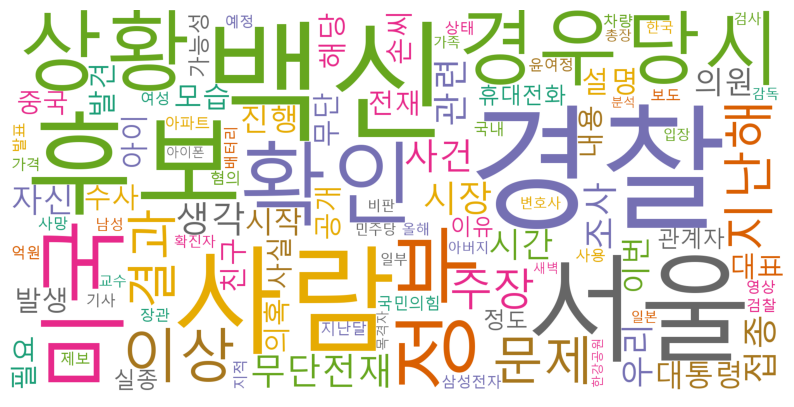

In [78]:
wc = WordCloud(font_path='malgun',width=2000, height=1000,background_color='white',colormap='Dark2',random_state=2)
wc.generate_from_frequencies(r4)

fig=plt.figure()
fig.set_size_inches(10,10)

plt.axis('off')
plt.imshow(wc)
plt.savefig('D:/marketing/wc/result1.png')

In [39]:
a = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]
a[2]

3

In [42]:
for i in range(5):
    print('i =', i)
    if i % 3 == 0:
        if i == 3:
            print('yes')
            continue
        print('no')

i = 0
no
i = 1
i = 2
i = 3
yes
i = 4
